In [1]:
import calour as ca
ca.set_log_level(20)
db=ca.database._get_database_class('dbbact')

creating logger


In [2]:
%matplotlib inline

# Load the chronic fatigue dataset

In [3]:
dat=ca.read_amplicon('./cfs.biom','./cfs.map.txt',normalize=10000,min_reads=1000)

2021-05-30 13:12:27 INFO loaded 87 samples, 2129 features
2021-05-30 13:12:27 WARNING These have metadata but do not have data - dropped (1): {'ERR1331814'}
2021-05-30 13:12:27 WARNING Do you forget to normalize your data? It is required before running this function
2021-05-30 13:12:27 INFO After filtering, 87 remain.


In [4]:
datc=dat.cluster_features(10)

2021-05-30 13:12:27 INFO After filtering, 1100 remain.


# Get the bacteria different between CFS Patients and Controls

In [5]:
dd=datc.diff_abundance('Subject','Patient','Control',random_seed=2019,alpha=0.1)

2021-05-30 13:12:28 INFO 87 samples with both values
2021-05-30 13:12:28 INFO After filtering, 1100 remain.
2021-05-30 13:12:28 INFO 48 samples with value 1 (['Patient'])
2021-05-30 13:12:28 INFO number of higher in Patient: 17. number of higher in Control : 46. total 63


# The dbBact release to use

In [6]:
# max_id = 3925 # release 10-20
max_id = 6237 # release 05-21

# Plot the enriched terms
We plot the 10 most enriched terms in any direction

## Command parameter details:
* max_show - how many enriched terms to show in the bar graph - we want 10 most enriched in CFS, 10 most enriched in Controls
* min_appearances - show only terms enriched in at least min_appearances differnt experiments. So if we set to 2, we will not see the terms that are enriched only in 1 experiment (e.g. physical activity, etc.)
* num_results_needed - To make the enriched terms analysis faster, stop after finding the num_results_needed enriched terms. needs to be equal to max_show
* add_single_exp_warning - if True, put a * next to terms that are enriched only in one experiment
* ignore_exp - a list of experiment IDs to ignore when testing enriched terms. We set to [12] since experiment 12 is the CFS experiment in dbbact, and we don't want to get enriched terms derived from annotations on this experiment. Can be set to True to ignore the current experiment

In [7]:
# set the y ticks font to bigger
import matplotlib
matplotlib.rc('ytick', labelsize=15)

## Plot the results.
We want 7 terms for each direction
Also ignore the annotations from this experiment in dbBact (expid=12)

2021-05-30 13:12:31 INFO Getting dbBact annotations for 63 sequences, please wait...
2021-05-30 13:12:33 INFO got 1222 annotations
2021-05-30 13:12:33 WARNING ignoring 6 annotation with id > max_id 6237
2021-05-30 13:12:33 INFO Got 8606 annotation-sequence pairs
2021-05-30 13:12:33 INFO Added annotation data to experiment. Total 1216 annotations, 63 ASVs
2021-05-30 13:12:35 INFO found 7 negative
2021-05-30 13:12:35 INFO found 7 positive


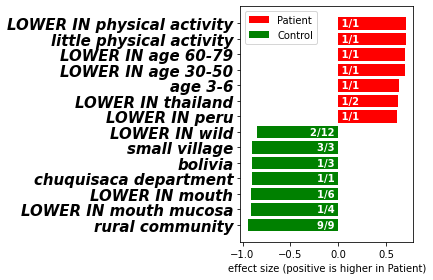

In [8]:
f,e=dd.plot_diff_abundance_enrichment(max_show=7, min_appearances=1, num_results_needed=7,add_single_exp_warning=False,colors=['r','g'], ignore_exp=[12], max_id=max_id)

In [9]:
f.set_xlim([-1,1])

(-1.0, 1.0)

In [10]:
e.feature_metadata.to_csv('./terms-cfs.csv')

In [11]:
f.figure.savefig('./fig2-query-enrichment.pdf')

In [12]:
f.figure.savefig('./fig2-query-enrichment.svg')